Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 11, 2022**. Therefore, the sheet is a bit longer and you can get a total of 26 points. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [1]:
# YOUR CODE HERE

## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

C:\Users\lisag\AppData\Local\Temp/ipykernel_12256/305517241.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


<Figure size 432x288 with 0 Axes>

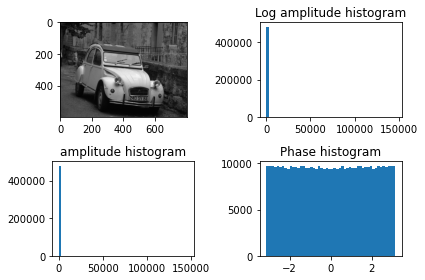

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

from numpy.fft import fft2, ifft2, fftshift

plt.gray()

img = plt.imread('images/dolly.png')

img_ft = fft2(img)

amplitude = np.abs(img_ft)
phase = np.angle(img_ft)

f, ax = plt.subplots(2,2)
ax[0,0].imshow(img)
ax[0,1].set_title("Log amplitude histogram")
ax[0,1].hist(amplitude.flatten(), bins=50, log=False)

ax[1,0].set_title("amplitude histogram")
ax[1,0].hist(amplitude.flatten(), bins=50, log=False)

ax[1,1].set_title("Phase histogram")
ax[1,1].hist(phase.flatten(), bins=50)

f.tight_layout()
f.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

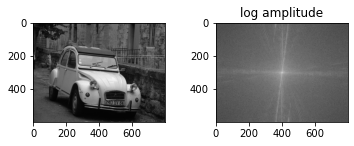

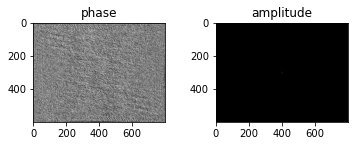

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

fig = plt.figure()


ax1 = fig.add_subplot(221)
plt.imshow(img)

ax2 = fig.add_subplot(222)
plt.imshow(np.log(amplitude))
plt.title("log amplitude")


fig2 = plt.figure()
ax3 = fig2.add_subplot(221)
plt.imshow(phase>0)
plt.title("phase")

ax4 = fig2.add_subplot(222)
plt.imshow(amplitude)
plt.title("amplitude")

plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

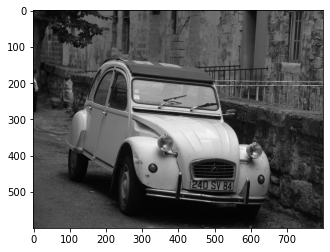

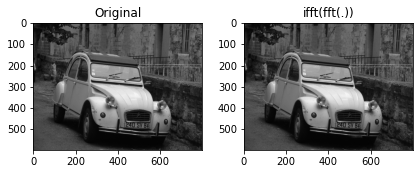

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.real(ifft2(np.abs(img_ft) * np.exp(1j * np.angle(img_ft)))))
plt.show()

f, axes = plt.subplots(1,2)
f.tight_layout()
axes[0].imshow(img)
axes[0].set_title("Original")
restored = ifft2(fft2(img))
axes[1].imshow(np.real(restored))
axes[1].set_title("ifft(fft(.))")
plt.show()

There is nothing to observe or repair, the two look identical.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

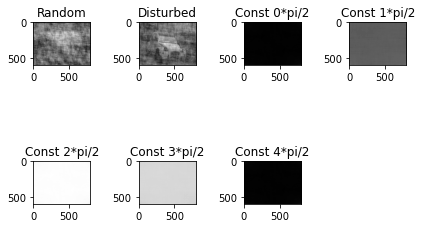

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# YOUR CODE HERE
def phase_amp_to_img(amplitude, phase):
    return np.real(ifft2(amplitude * np.exp(1j * phase)))

amplitude = np.abs(img_ft)
phase_random = np.random.uniform(phase.min(), phase.max(), phase.shape)
phase_disturbed = phase + np.random.normal(size=phase.shape)
phase_constants = [np.full(phase.shape, value) for value in (k * np.pi / 2 for k in range(0, 5))]

f, ax = plt.subplots(2,4)
f.delaxes(ax[-1,-1])
f.tight_layout()
images = [ phase_amp_to_img(amplitude, phase_random),
        phase_amp_to_img(amplitude, phase_disturbed) ] + list(map(lambda p:phase_amp_to_img(amplitude, p), phase_constants))
titles = ['Random', 'Disturbed'] + ['Const %d*pi/2' % k for k in range(0, 5)]
for i in range(0, 7):
    ax[i//4, i % 4].imshow(images[i])
    ax[i//4, i % 4].set_title(titles[i])
plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


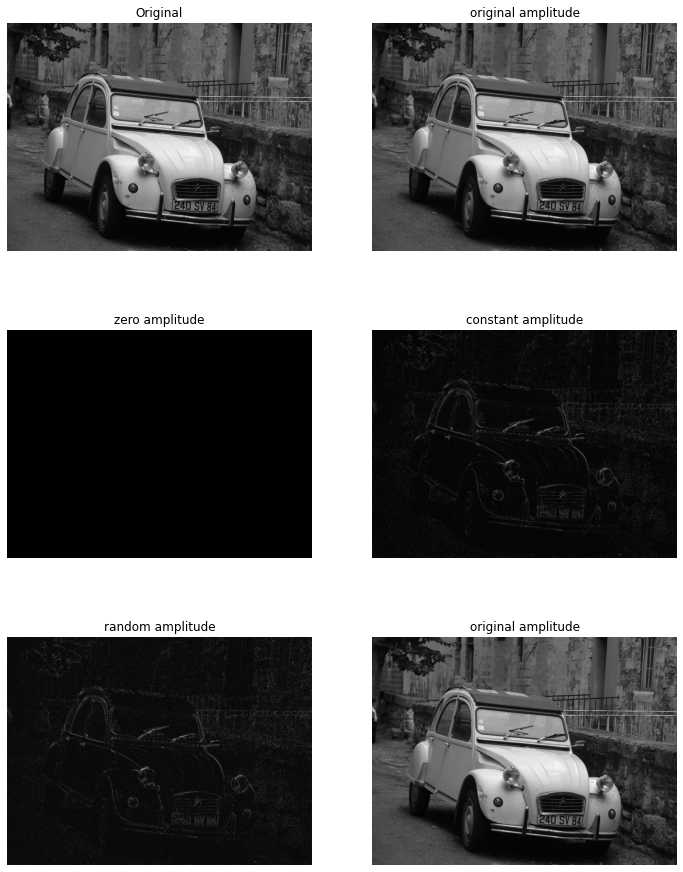

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

The Phase of a picture contains information about the structure of an image. Because the Phase is kept in this example, the structure of the car can be guessed. The amplitude on the other hand, provides how birght the waves of an image are. This is why the example images given above are that dark.

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

YOUR ANSWER HERE

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

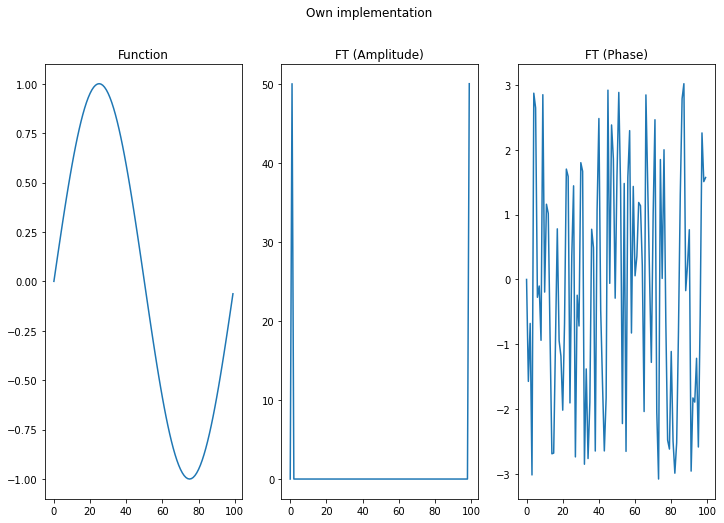

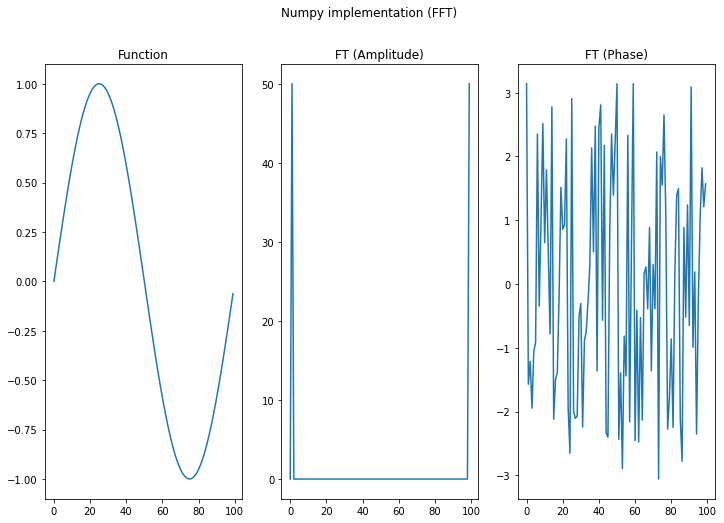

In [8]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    #ft = np.zeros(func.shape, dtype=complex)
    ft = []
    for n in range(0, len(func)):
        sum = 0
        for x in range(0, len(func)):
            sum += func[x] * np.exp(2*-1j*np.pi*n*x/len(func))
        ft.append(sum)
    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


#func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

first
done


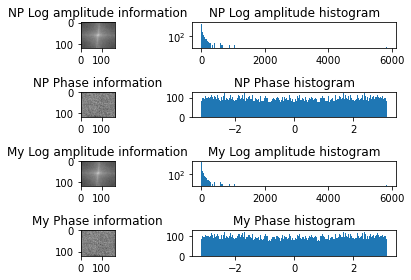

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """
    
    # YOUR CODE HERE ----------------------------------------------------------------------------------------------
    ft = np.zeros(img.shape, dtype=complex)
    M = img.shape[0]
    N = img.shape[1]
    for u in range(0, img.shape[0]):
        for v in range(0, img.shape[1]):
            # use meshgrid to make (xx,yy) pairs for all coords in x and y.
            # Like this we can evaluate the expression on a grid with fixed u, v
            # for all values of x and y at once
            xx, yy = np.meshgrid(np.arange(M), np.arange(N))
            ft[u,v] = np.sum(img[xx, yy] * np.exp(-1j * 2 * np.pi * (u*xx/M +v*yy/N)))
    #--------------------------------------------------------------------------------------------------------------
    print("done")
    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')
img = rescale(img, 0.2)

# YOUR CODE HERE --------------------------------------------------------------------------------------------------
print("first")

img_ft = fft2(img)
img_ft_shift = fftshift(img_ft)

amplitude = np.abs(img_ft_shift)
phase = np.angle(img_ft)

my_img_ft = fourier2d(img)
my_img_ft_shift = fftshift(img_ft)

my_amplitude = np.abs(my_img_ft_shift)
my_phase = np.angle(my_img_ft)

f, ax = plt.subplots(4,2)
ax[0,0].set_title("NP Log amplitude information")
ax[0,0].imshow(np.log(amplitude))
ax[0,1].set_title("NP Log amplitude histogram")
# histograms?? how do I get the power spectrum?
ax[0,1].hist(amplitude.flatten(), bins=200, log=True)

ax[1,0].set_title("NP Phase information")
ax[1,0].imshow(phase)
ax[1,1].set_title("NP Phase histogram")
ax[1,1].hist(phase.flatten(), bins=200)

ax[2,0].set_title("My Log amplitude information")
ax[2,0].imshow(np.log(my_amplitude))
ax[2,1].set_title("My Log amplitude histogram")
# histograms?? how do I get the power spectrum?
ax[2,1].hist(my_amplitude.flatten(), bins=200, log=True)

ax[3,0].set_title("My Phase information")
ax[3,0].imshow(my_phase)
ax[3,1].set_title("My Phase histogram")
ax[3,1].hist(my_phase.flatten(), bins=200)

f.tight_layout()

#-----------------------------------------------------------------------------------------------------------------#

plt.show()

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

In mathematics and in particular, functional analysis, convolution is a mathematical operator which takes two functions f and g and produces a third function that in a sense represents the amount of overlap between f and a reversed and translated version of g. A convolution is a kind of very general moving average, as one can see by taking one of the functions to be an indicator function of an interval. 
The relationship between the spatial domain and the frequency domain can be established by convolution theorem.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

$$r(x) = {g * h}(x) = \mathfrak{F}^{-1}{G \cdot H} $$

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


? 2D / 1D ? Convolution                             

FFT   2D  O(n^2 log^2 n)  --> O(n^4)   
FFT   3D  O(n^3 log^3 n) -->  O(n^6)


**d)** Proof the convolution theorem.

YOUR ANSWER HERE

## Exercise 4: Filter design and frequency space[6 points]

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 13 # vary this
image_size = 100

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

# YOUR CODE HERE

box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

YOUR ANSWER HERE

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

f_max = 30
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    result = image
    # YOUR CODE HERE
    return result

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

YOUR ANSWER HERE

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

YOUR ANSWER HERE

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

YOUR ANSWER HERE

## Exercise 5: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

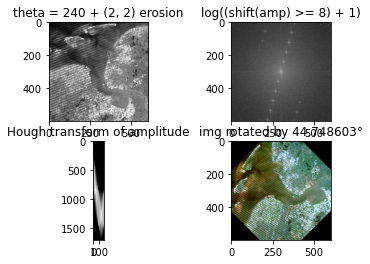

In [18]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_erosion

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

text_thresh = 240
img = img > text_thresh


structure = np.ones((2,2))

#img = binary_erosion(img_gray, structure)
img = img_gray


f = plt.figure()
ax = f.add_subplot(2,2,1)
ax.set_title("theta = %d + %s erosion" % (text_thresh, structure.shape))
ax.imshow(img)

ft = np.fft.fft2(img)
amp, phase = (np.abs(ft), np.angle(ft))

amp_thresh = 8
#amp[np.log(amp) < amp_thresh] = 0

ax = f.add_subplot(2,2,2)
ax.set_title("log((shift(amp) >= %d) + 1)" % (amp_thresh))
ax.imshow(np.log(np.fft.fftshift(amp + 1)))

hough, angles, dists = hough_line(amp)
peak_vals, peak_angles, peak_dists = hough_line_peaks(hough, angles, dists)
peak_angles_deg = np.rad2deg(peak_angles)

ax = f.add_subplot(2,2,3)
ax.imshow(hough)
ax.set_title("Hough transform of amplitude")

ax = f.add_subplot(2,2,4)
ax.set_title("img rotated by %f°" % peak_angles_deg[0])
img = plt.imread('images/landsat_stack2.png')
ax.imshow(rotate(img, peak_angles_deg[0]))

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

image analysis, image filtering, image reconstruction and image compression. (TOO broad ranges)